# Descriptive and Predictive Analysis of Data Set

In [9]:
#Import all relevant libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

#scikit-learn parts are imported from individual modules as necessary

In [2]:
#Load the dataset 

mydata = pd.read_csv("dataset_clean.csv", delimiter = ',')
mydata = mydata[['Metal Cation', 'Atomic Number', 'Electronegativity', 'Ionic Radius (pm)', 'Oxide Formula', 'Solubility']]

In [3]:
# Display first 5 rows to check properly read dataset       .head(rows)
# and let's print some information about the size of the dataframe and the data types within
print("The first five rows of the dataframe, including headers, are: \n", mydata.head(5), "\n")
print("The data types within each column are: \n", mydata.dtypes, "\n")
print("The shape of the dataframe (rows, columns) is: ", mydata.shape)
print("For a total of", mydata.size, " number of elements.")


The first five rows of the dataframe, including headers, are: 
   Metal Cation  Atomic Number  Electronegativity  Ionic Radius (pm)  \
0          Li+              3               0.98               76.0   
1          Na+             11               0.93              102.0   
2           K+             19               0.82              138.0   
3         Mg2+             12               1.31               72.0   
4         Ca2+             20               1.00              100.0   

  Oxide Formula  Solubility  
0          Li₂O           1  
1          Na₂O           1  
2           K₂O           1  
3           MgO           0  
4           CaO           0   

The data types within each column are: 
 Metal Cation          object
Atomic Number          int64
Electronegativity    float64
Ionic Radius (pm)    float64
Oxide Formula         object
Solubility             int64
dtype: object 

The shape of the dataframe (rows, columns) is:  (90, 6)
For a total of 540  number of elements.


In [4]:
# Descriptive statitics of data set .describe()
mydata.describe()

,Atomic Number,Electronegativity,Ionic Radius (pm),Solubility
count,90.000000,90.000000,90.000000,90.000000
mean,50.677778,1.644000,89.316667,0.100000
std,25.053125,0.468907,27.629618,0.301681
min,3.000000,0.700000,31.000000,0.000000
25%,26.250000,1.222500,69.000000,0.000000
50%,50.000000,1.655000,86.000000,0.000000
75%,75.750000,2.010000,102.000000,0.000000
max,89.000000,2.540000,170.000000,1.000000


<Axes: title={'center': 'Electronegativity - Atomic Number relation'}, ylabel='Frequency'>

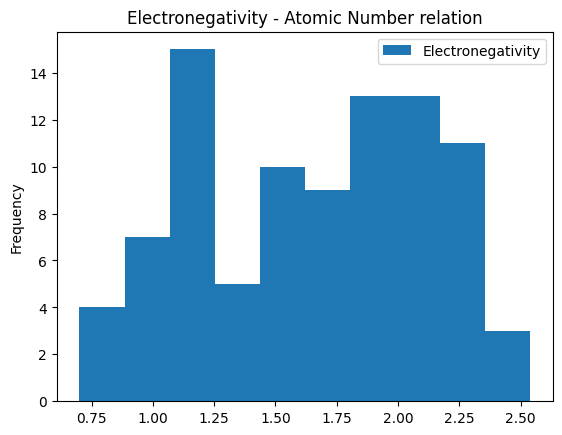

In [5]:
# EXPLORATORY ANALYSIS, LET'S HAVE A LOOK
mydata.head(2)
mydata.plot(x="Atomic Number", y="Electronegativity", kind="hist", title="Electronegativity - Atomic Number relation" )

In [14]:
# K-NEAREST NEIGHBOURS KNN CLASSIFIER. KNN IS NOT CLUSTERING. REVIEW DIFFERENCE

from sklearn.neighbors import KNeighborsClassifier

myknn = KNeighborsClassifier()

# Split data into training and test
from sklearn.model_selection import train_test_split

#train_test_split function does not work well with dataset columns????? So select them and extract them first as Xdata and ydata. Split later
Xdata = mydata[['Electronegativity']]
ydata = mydata['Solubility']

X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.2, random_state=42) #remember to randomise or the data will be split exactly 80/20 sequentially so to speak


#Perform fit/training of model
myknn.fit(X_train, y_train)



KNeighborsClassifier()

In [15]:
#perfom predictin, testing of model
y_predict = myknn.predict(X_test)

# some metrics, import all of them
from sklearn.metrics import *

confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))

#REVIEW MEANING OF SCORES PRINTED BELOW!!!


              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       0.00      0.00      0.00         2

    accuracy                           0.89        18
   macro avg       0.44      0.50      0.47        18
weighted avg       0.79      0.89      0.84        18



C:\Users\MarioFalsaperna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MarioFalsaperna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MarioFalsaperna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages

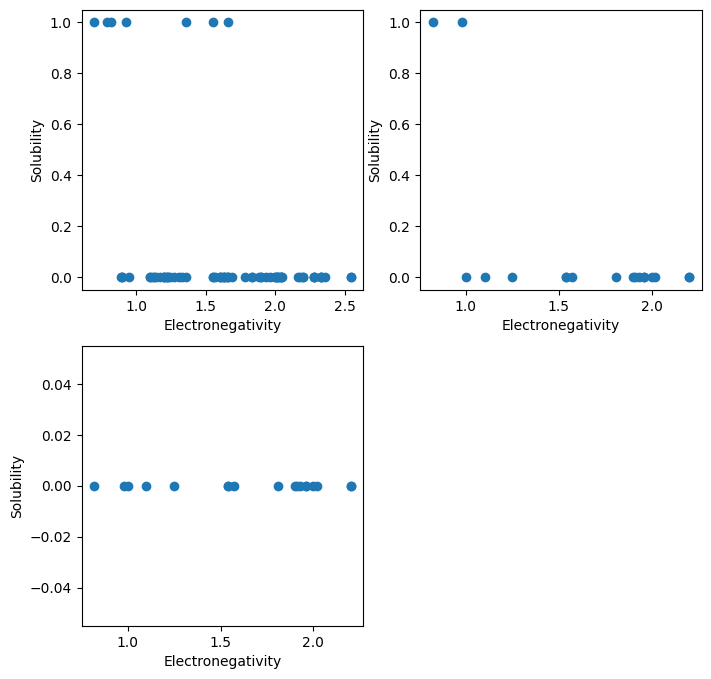

In [36]:
# Let's plot some results?

plt.figure(figsize=(8,8))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)

ax1.scatter(x=X_train, y=y_train)
ax1.set_xlabel('Electronegativity')
ax1.set_ylabel('Solubility')

ax2.scatter(x=X_test, y=y_test)
ax2.set_xlabel('Electronegativity')
ax2.set_ylabel('Solubility')

ax3.scatter(x=X_test, y=y_predict)
ax3.set_xlabel('Electronegativity')
ax3.set_ylabel('Solubility')



plt.show()